# Top Earners in Movie Industry

## Table of Contents

<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id="#intro"></a>
## Introduction

> This analysis project is to be done using the imdb movie data. When the analysis is completed, you should be able to find the top 5 highest grossing directors, the top 5 highest grossing movie genres of all time, comparing the revenue of the highest grossing movies and which companies released the most movies. 

> There are 10 columns that will not be needed for the analysis. Use pandas to drop these columns. HINT: Only the columns pertaining to revenue will be needed.

> To get you started, I've already placed the needed code for getting the packages and datafile that you will be using for the project. 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('imdb-movies.csv')

### Drop columns without neccesary information and remove all records with no financial information -- Pay close attention to things that don't tell you anything regarding financial data

In [3]:
df.drop(['overview', 'vote_count', 'homepage', 'popularity', 'id', 'imdb_id', 'cast', 'tagline', 'runtime', 'vote_average'], axis=1, inplace=True)

In [4]:
df.drop(['keywords'], axis=1, inplace=True)

In [5]:
df

,budget,revenue,original_title,director,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,1.379999e+08,3.481613e+08
2,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,1.012000e+08,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,1.839999e+08,1.902723e+09
4,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...
10861,0,0,The Endless Summer,Bruce Brown,Documentary,Bruce Brown Films,6/15/66,1966,0.000000e+00,0.000000e+00
10862,0,0,Grand Prix,John Frankenheimer,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,1966,0.000000e+00,0.000000e+00
10863,0,0,Beregis Avtomobilya,Eldar Ryazanov,Mystery|Comedy,Mosfilm,1/1/66,1966,0.000000e+00,0.000000e+00
10864,0,0,"What's Up, Tiger Lily?",Woody Allen,Action|Comedy,Benedict Pictures Corp.,11/2/66,1966,0.000000e+00,0.000000e+00


### Data Cleaning

In [6]:
# Delete all records with null, or empty values
df.dropna(inplace=True)

#### Here's a helpful hint from my own analysis when I ran this the first time. This may help shed light on what your data set should look like.

#### If I created one record for each the `production_companies` a movie was release under and one record each for `genres`<br>and tried to run calculations, it wouldn't work because for many records, the amount of `production_companies`<br>and `genres` aren't the same, so I'll create 2 dataframes; one w/o a `production_companies` column and one w/o a `genres` columns

<a id="eda"></a>
## Exploratory Data Analysis

> Use Matplotlib to display your data analysis

### Which production companies released the most movies in the last 10 years? Display the top 5 production companies.

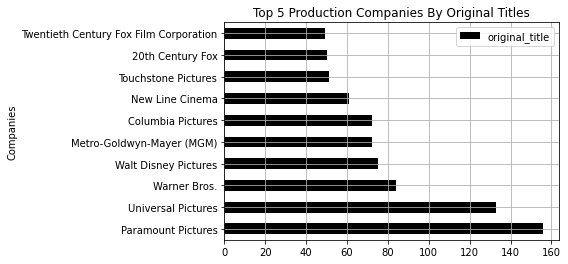

In [13]:
top_five_prod = df.copy()
top_five_prod.drop(['budget', 'revenue', 'director', 'genres', 'release_date', 'budget_adj', 'revenue_adj', 'release_year'], axis=1, inplace=True)
top_five_counts = top_five_prod.groupby('production_companies').count()
top_five_answer = top_five_counts.sort_values(by=['original_title'], ascending=False).head(10)
graph_result = top_five_answer.plot(kind='barh', title='Top 5 Production Companies By Original Titles', ylabel='Number of Original Titles', xlabel='Companies', color=['black'])
graph_result.grid()


### What 5 movie genres grossed the highest all-time?

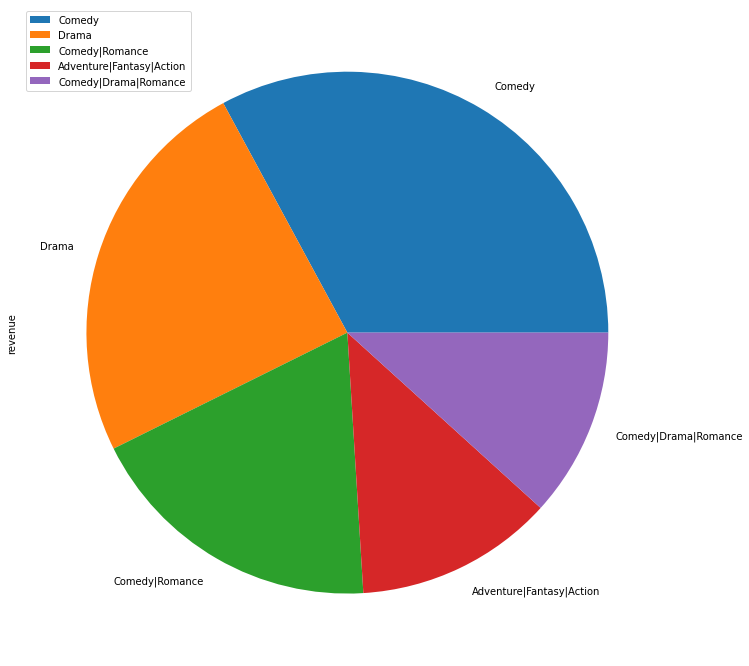

In [8]:
highest_gross_genres = df.copy()
genre_second_filt = highest_gross_genres.groupby('genres').sum()
action_gross = genre_second_filt.sort_values(by=['revenue'], ascending=False).head(5)
action_gross.drop(['budget', 'budget_adj', 'revenue_adj', 'release_year'],axis=1, inplace=True)
action_gross.plot(kind="pie", subplots=True, figsize=(15, 12));

### Who are the top 5 grossing directors?

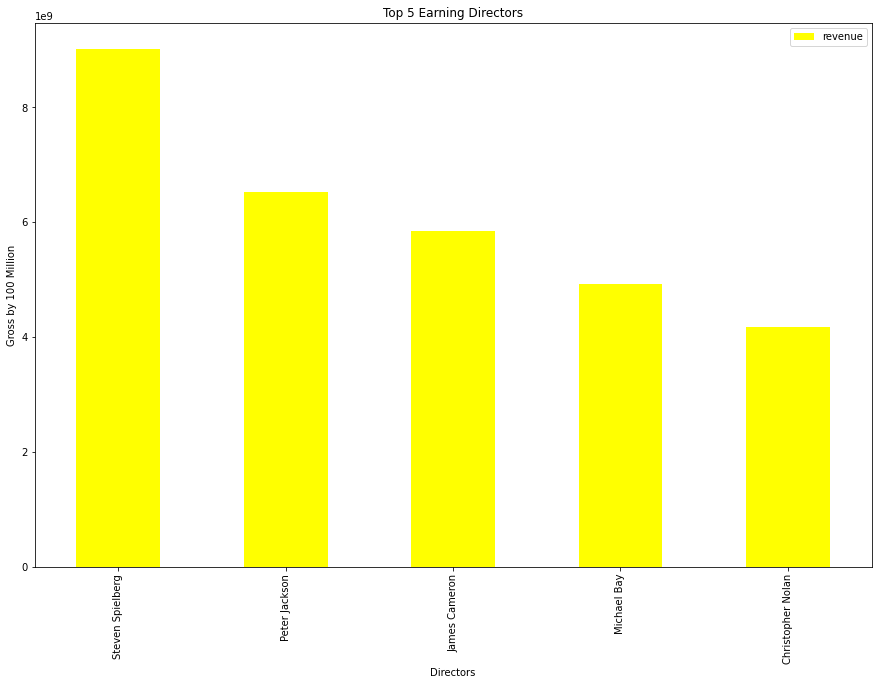

In [9]:
director_filter = df.copy()
director_filter.drop(['original_title', 'budget', 'genres', 'release_date', 'production_companies', 'release_year', 'budget_adj', 'revenue_adj', 'release_date'], axis=1, inplace=True)
second_director_filter = director_filter.groupby('director').sum()
top_five_gross = second_director_filter.nlargest(5, 'revenue')
top_five_gross.plot(kind='bar',title='Top 5 Earning Directors', ylabel="Gross by 100 Million", xlabel='Directors', color=['yellow'], figsize=(15,10));


### Compare the revenue of the highest grossing movies of all time.

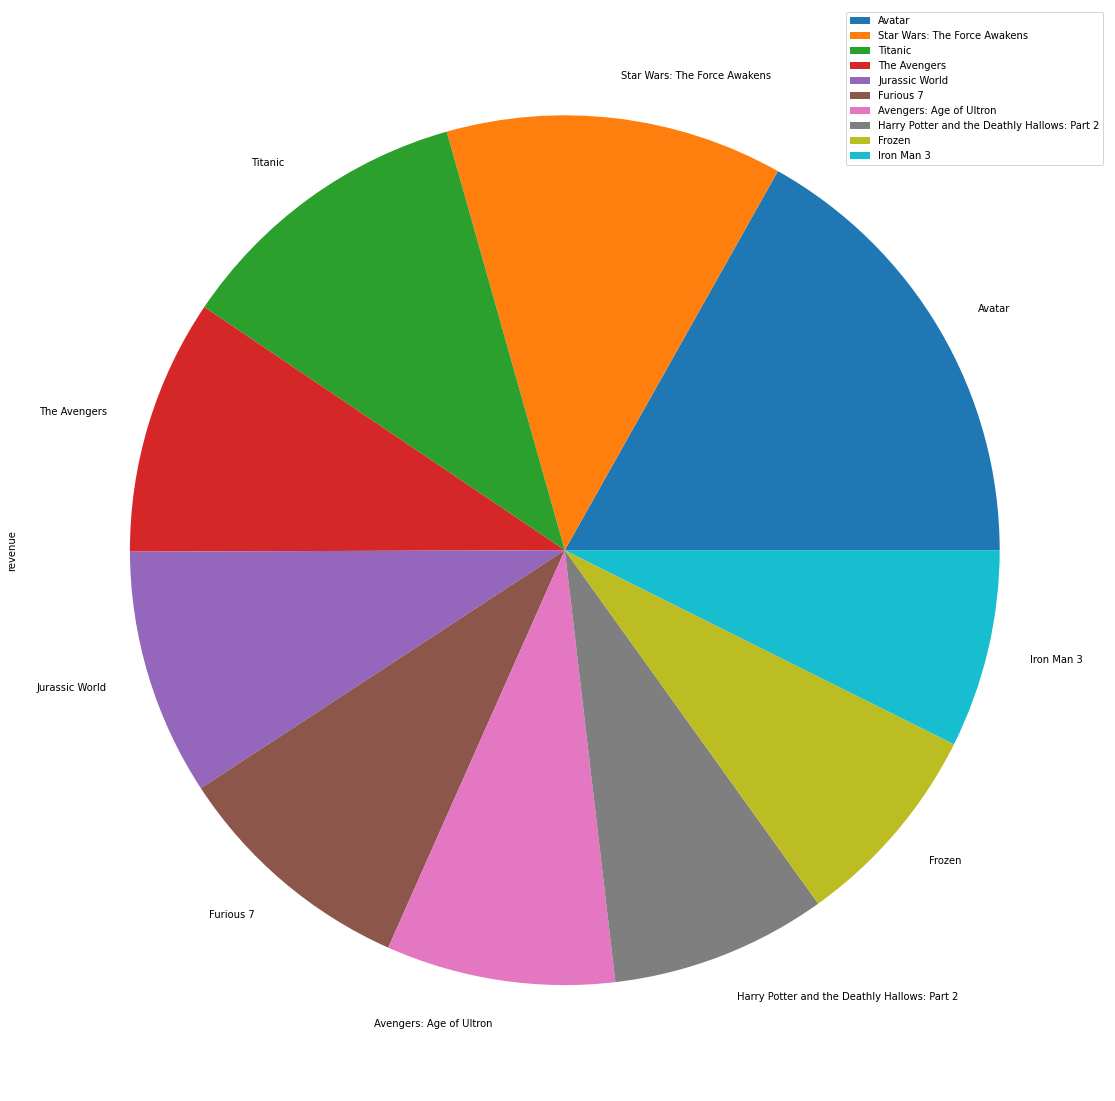

In [10]:
# I really like pie charts

movie_gross = df.copy()
movie_gross.drop(['director', 'budget', 'genres', 'production_companies', 'release_date', 'release_year', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
top_ten_earning_films = movie_gross.groupby('original_title').sum()
finalized = top_ten_earning_films.nlargest(10, 'revenue')
finalized.plot(kind='pie', subplots=True, figsize=(25,20));


<a id="conclusions"></a>
## Conclusions

> Using the cell below, write a brief conclusion of what you have found from the anaylsis of the data. The Cell below will allow you to write plan text instead of code.

After cleaning and organizing the IMDB data, I was able to find the highest grossing directors of all time, the highest grossing films of all time, which genre of film has the highest gross earnings, and which production companies produced those films. The highest grossing production companies and the highest grossing films have a strong correlation present in the findings. While some films, such as James Cameron's Avatar show a monumental box office revenue of $2.8 billion without the resources of a top-5 production company (20th Century Fox is the 9th highest gross), each of the other films in the top 10 listing directly benefited from one of the top-5 production companies.